In [82]:
import matplotlib.pylab as plt
import random
import seaborn as sns
import sklearn.utils
import scipy
import statsmodels.api as sm
import numpy as np
import pandas as pd
%matplotlib inline

sns.set()


In [83]:
loans_income = pd.read_csv("data/data_wk2/loans_income.csv", squeeze=True)

results = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Raw Data'
})

for i in range(5, 50, 5):
    intermediate = pd.DataFrame({
        'income': [loans_income.sample(i).mean() for _ in range(1000)],
        'type': f'Mean of {i}'
    })

    results = pd.concat([results, intermediate])

print(results.head())


        income      type
39460  34000.0  Raw Data
812    85000.0  Raw Data
34952  30226.0  Raw Data
9526   85000.0  Raw Data
25944  82160.0  Raw Data


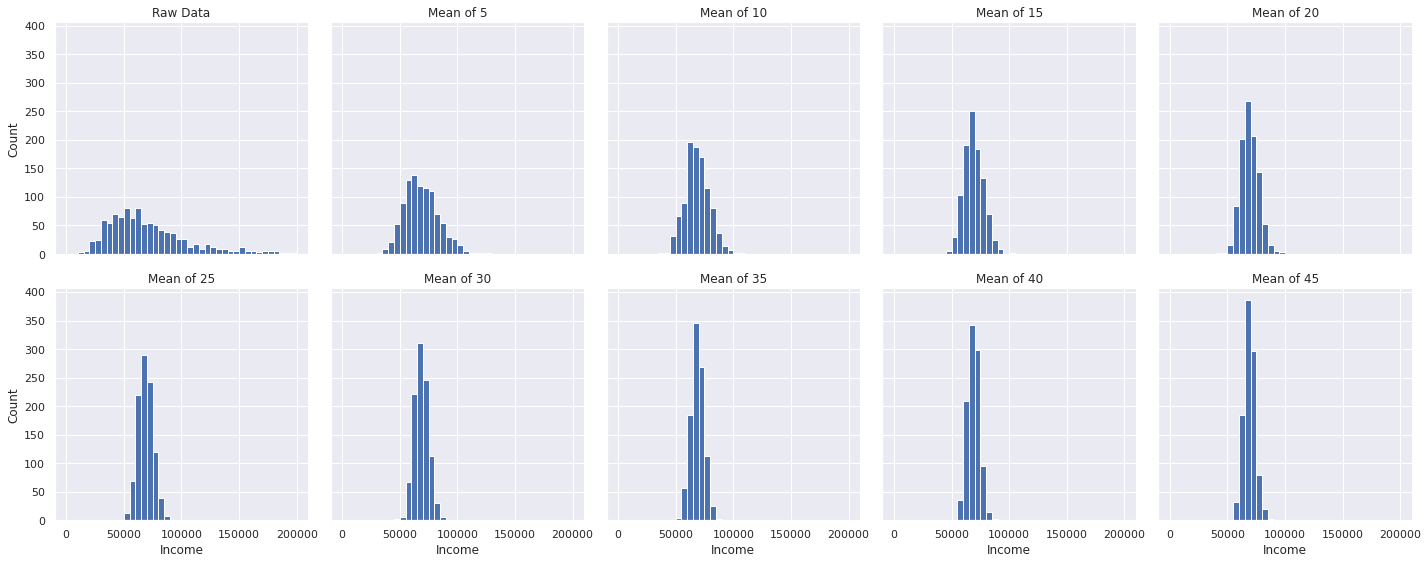

In [84]:
# Multi-plot grid for plotting conditional relationships...
# Maps a dataset onto multiple axes arrayed in a grid of rows and columns that
# correspond to levels of variables in the dataset. The plots it produces are
# often called “lattice”, “trellis”, or “small-multiple” graphics
grid = sns.FacetGrid(results, col='type', col_wrap=5, height=4, aspect=1)

# Apply a plotting function to each facet’s subset of the data.
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)

grid.set_axis_labels('Income', 'Count')
grid.set_titles('{col_name}')

plt.tight_layout()
plt.show()

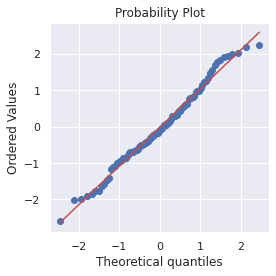

In [85]:
fig, ax = plt.subplots(figsize=(4, 4))

rand_normal_sample = scipy.stats.norm.rvs(size=100)
scipy.stats.probplot(rand_normal_sample, plot=ax)

plt.tight_layout()
plt.show()

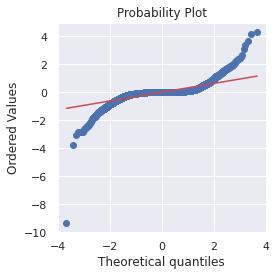

In [86]:
sp500_px = pd.read_csv('data/data_wk2/sp500_data.csv.gz')

nflx = sp500_px.NFLX

fig, ax = plt.subplots(figsize=(4, 4))
scipy.stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()


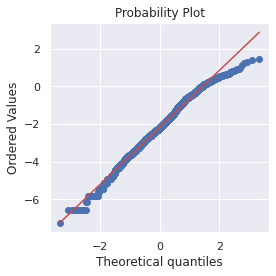

In [87]:
nflx = np.log(nflx[nflx > 0])
fig, ax = plt.subplots(figsize=(4, 4))
scipy.stats.probplot(nflx, plot=ax)
plt.tight_layout()
plt.show()

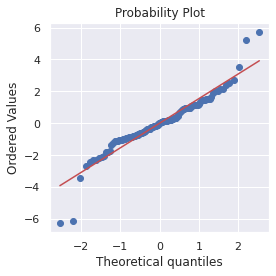

In [88]:
nflx = np.diff(np.log(nflx[nflx > 0]))
fig, ax = plt.subplots(figsize=(4, 4))
scipy.stats.probplot(nflx, plot=ax)
plt.tight_layout()
plt.show()